Assignment 7 _ group 5                                                                            
Sandeep Anumula                                                                                      
Nikhil Bathini                                                          
Saiprashanth Reddy Dyapa                                                                                 
Shirisha Teegala                                                                                                
Nikith Vemula                                                                                              

Analyzing housing.data.txt with a Linear Regression Model In this exercise, we will analyze the housing.data.txt dataset using a linear regression model to predict the dependent variable, Y—the median value of owner-occupied homes (in $1000). This prediction will be based on 13 independent variables (X). You can refer to the dataset and its explanation at Machine Learning Mastery for the 13 independent variables (X) and the dependent variable (Y) in the dataset: CRIM: per capita crime rate by town. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. INDUS: proportion of nonretail business acres per town. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). NOX: nitric oxides concentration (parts per 10 million). RM: average number of rooms per dwelling. AGE: proportion of owner-occupied units built prior to 1940. DIS: weighted distances to five Boston employment centers. RAD: index of accessibility to radial highways. TAX: full-value property-tax rate per $10,000. PTRATIO: pupil-teacher ratio by town. B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town. LSTAT: % lower status of the population. MEDV: Median value of owner-occupied homes in $1000s. 
Tasks: 1. Use both statsmodels and scikit-learn to perform linear regression on the dataset. 2. Evaluate the performance of the models using appropriate metrics. 3. Plot the results to visualize the relationship between the independent variables and the dependent variable, following the demonstration from this chapter’s example.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

1. Use both statsmodels and scikit-learn to perform linear regression on the dataset. 

In [23]:


# Define column headers based on dataset description
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Load the dataset
data = pd.read_csv("housing.data.txt", sep='\s+', names=columns)

# Split features and target
X = data.drop("MEDV", axis=1)  # Independent variables
y = data["MEDV"]               # Dependent variable
import statsmodels.api as sm

# Add a constant term to the predictors (for the intercept)
X_const = sm.add_constant(X)

# Fit the linear regression model
model_sm = sm.OLS(y, X_const).fit()

# Display the regression results
print(model_sm.summary())

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model_sk = LinearRegression()
model_sk.fit(X_train, y_train)

# Make predictions
y_pred = model_sk.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("=== scikit-learn Linear Regression Results ===")
print(f"Intercept: {model_sk.intercept_:.2f}")
print(f"Coefficients: {model_sk.coef_}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          6.72e-135
Time:                        23:02:54   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

2. Evaluate the performance of the models using appropriate metrics. 

In [24]:
# 1. Linear Regression: statsmodels

y_pred_sm = model_sm.predict(X_const)

# Evaluation for statsmodels
mse_sm = mean_squared_error(y, y_pred_sm)
rmse_sm = np.sqrt(mse_sm)
r2_sm = r2_score(y, y_pred_sm)

print("=== Statsmodels Linear Regression ===")
print(f"MSE: {mse_sm:.2f}")
print(f"RMSE: {rmse_sm:.2f}")
print(f"R² Score: {r2_sm:.2f}")


# 2. Linear Regression: scikit-learn
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
y_pred_sk = model_sk.predict(X_test)

# Evaluation for scikit-learn
mse_sk = mean_squared_error(y_test, y_pred_sk)
rmse_sk = np.sqrt(mse_sk)
r2_sk = r2_score(y_test, y_pred_sk)

print("\n=== Scikit-learn Linear Regression ===")
print(f"MSE: {mse_sk:.2f}")
print(f"RMSE: {rmse_sk:.2f}")
print(f"R² Score: {r2_sk:.2f}")


=== Statsmodels Linear Regression ===
MSE: 21.89
RMSE: 4.68
R² Score: 0.74

=== Scikit-learn Linear Regression ===
MSE: 24.29
RMSE: 4.93
R² Score: 0.67


3. Plot the results to visualize the relationship between the independent variables and the
dependent variable, following the demonstration from this chapter’s example.

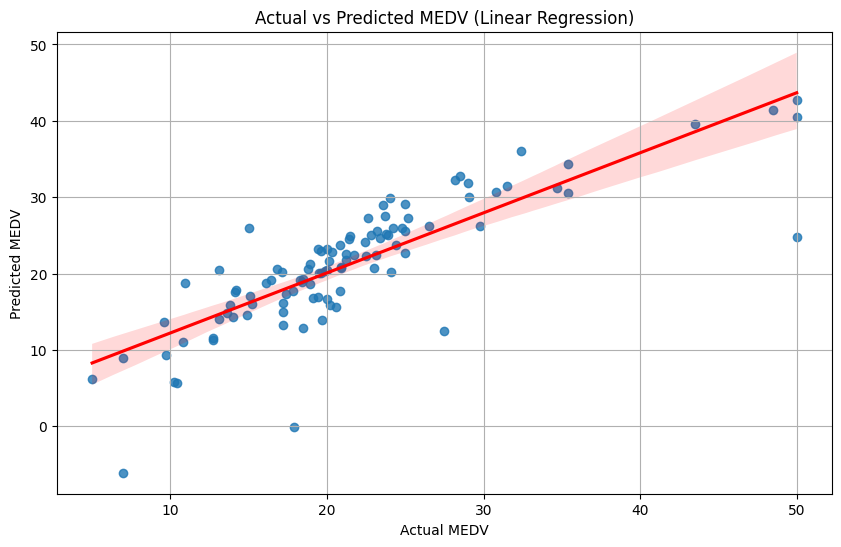

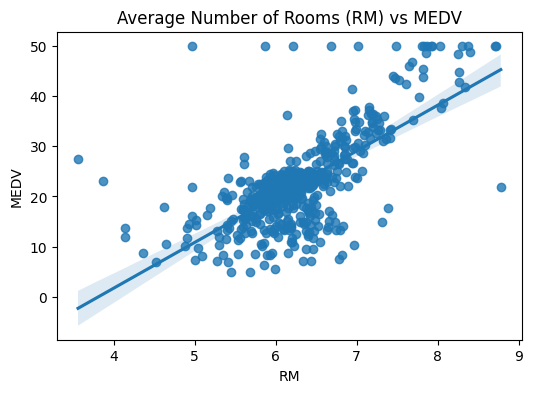

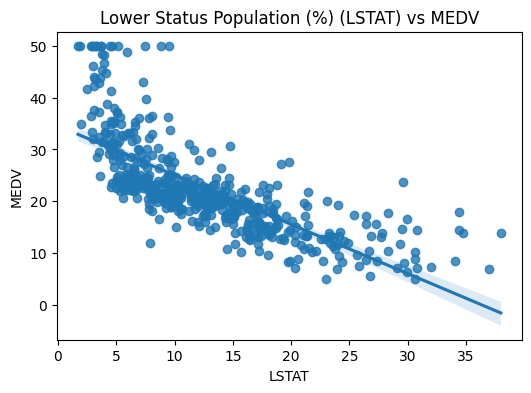

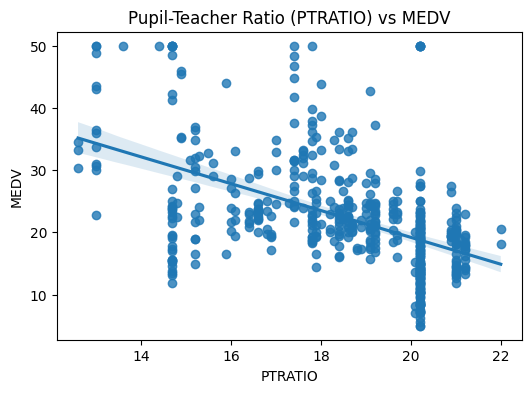

In [25]:
# Visualizations
# ---------------------
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_sk, line_kws={"color": "red"})
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV (Linear Regression)")
plt.grid(True)
plt.show()

# Example: RM vs MEDV
plt.figure(figsize=(6, 4))
sns.regplot(x="RM", y="MEDV", data=data)
plt.title("Average Number of Rooms (RM) vs MEDV")
plt.show()

# Example: LSTAT vs MEDV
plt.figure(figsize=(6, 4))
sns.regplot(x="LSTAT", y="MEDV", data=data)
plt.title("Lower Status Population (%) (LSTAT) vs MEDV")
plt.show()

# Example: PTRATIO vs MEDV
plt.figure(figsize=(6, 4))
sns.regplot(x="PTRATIO", y="MEDV", data=data)
plt.title("Pupil-Teacher Ratio (PTRATIO) vs MEDV")
plt.show()


Analyzing pima-indians-diabetes.csv with a Logistic Regression Model In this exercise, we will analyze the pima-indians-diabetes.csv 
dataset using a logistic regres- sion model to predict onset of diabetes. This prediction will be based on 8 medical features. 
You can refer to the dataset and its explanation at Machine Learning Mastery for the 8 fea- tures and the one output in the dataset: Number of times 
pregnant. Plasma glucose concentration a 2 hours in an oral glucose tolerance test. Diastolic blood pressure (mm Hg). Triceps skinfold thickness (mm).
2-Hour serum insulin (mu U/ml). Body mass index (weight in kg/(height in m)^2). Diabetes pedigree function. Age (years). Class variable (0 or 1). 


 4. Use both statsmodels and scikit-learn to perform logistic regression on the dataset. 
5. Evaluate the performance of the models using appropriate metrics.

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import statsmodels.api as sm

# Define column names
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

# Load the dataset
df = pd.read_csv('pima-indians-diabetes.csv', header=None, names=column_names)

# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ============================
# Logistic Regression with Statsmodels
# ============================
# Add intercept term
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Predictions for Statsmodels
X_test_sm = sm.add_constant(X_test)
y_pred_prob_sm = result.predict(X_test_sm)
y_pred_class_sm = (y_pred_prob_sm >= 0.5).astype(int)

# Statsmodels Evaluation
print("=== Statsmodels Logistic Regression ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_class_sm):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_class_sm)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_class_sm)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_sm):.4f}")

# ============================
# Logistic Regression with Scikit-learn
# ============================
# Train the model with Scikit-learn
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# Predictions for Scikit-learn
y_pred_sklearn = lr.predict(X_test)
y_pred_prob_sklearn = lr.predict_proba(X_test)[:, 1]

# Scikit-learn Evaluation
print("\n=== Scikit-learn Logistic Regression ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sklearn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_sklearn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_sklearn)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_sklearn):.4f}")


Optimization terminated successfully.
         Current function value: 0.459388
         Iterations 6
=== Statsmodels Logistic Regression ===
Accuracy: 0.7359
Confusion Matrix:
[[120  31]
 [ 30  50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

ROC AUC Score: 0.7972

=== Scikit-learn Logistic Regression ===
Accuracy: 0.7359
Confusion Matrix:
[[120  31]
 [ 30  50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74